In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

In [4]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False


# MFG_MACHINE 데이터셋 확인

In [5]:
mfg_machine=pd.read_csv("data/MFG_MACHINE.csv", encoding="cp949", parse_dates=['DATE_1BLACK', 'TIME_1BLACK', 'TIME_2AG',
       'TIME_3BUS', 'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE',
       'TIME_8AGING'])
mfg_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 29 columns):
JUDGE                     4000 non-null object
LOT_ID                    4000 non-null object
PANEL_ID                  4000 non-null object
DATE_1BLACK               4000 non-null datetime64[ns]
TIME_1BLACK               4000 non-null datetime64[ns]
TIME_2AG                  4000 non-null datetime64[ns]
TIME_3BUS                 4000 non-null datetime64[ns]
TIME_4DIELEC              4000 non-null datetime64[ns]
TIME_5MGO                 4000 non-null datetime64[ns]
TIME_6PHOS                4000 non-null datetime64[ns]
TIME_7PASTE               4000 non-null datetime64[ns]
TIME_8AGING               4000 non-null datetime64[ns]
MC_1BLACK_1PRINT          4000 non-null object
MC_1BLACK_2RTD            4000 non-null object
MC_2AG_1PRINT             4000 non-null object
MC_2AG_2RTD               4000 non-null object
MC_2AG_3EXPOSURE          4000 non-null object
MC_3BUS_1DEVELOP      

In [6]:
mfg_machine.isnull().sum()

JUDGE                     0
LOT_ID                    0
PANEL_ID                  0
DATE_1BLACK               0
TIME_1BLACK               0
TIME_2AG                  0
TIME_3BUS                 0
TIME_4DIELEC              0
TIME_5MGO                 0
TIME_6PHOS                0
TIME_7PASTE               0
TIME_8AGING               0
MC_1BLACK_1PRINT          0
MC_1BLACK_2RTD            0
MC_2AG_1PRINT             0
MC_2AG_2RTD               0
MC_2AG_3EXPOSURE          0
MC_3BUS_1DEVELOP          0
MC_3BUS_2FIRE             0
MC_4DIELEC_1FIRE          0
MC_5MGO                   0
MC_6PHOS_1R_1DISPENSER    0
MC_6PHOS_1R_2DRY          0
MC_6PHOS_2G_1DISPENSER    0
MC_6PHOS_2G_2DRY          0
MC_6PHOS_3B_1DISPENSER    0
MC_6PHOS_4FIRE            0
MC_7PASTE                 0
MC_8AGING                 0
dtype: int64

In [8]:
mfg_machine[mfg_machine['MC_3BUS_1DEVELOP']=='2호기'].shape

(2040, 29)

In [9]:
mfg_machine[mfg_machine['MC_3BUS_1DEVELOP']!='2호기'].shape

(1960, 29)

In [215]:
mfg_machine.columns

Index(['JUDGE', 'LOT_ID', 'PANEL_ID', 'DATE_1BLACK', 'TIME_1BLACK', 'TIME_2AG',
       'TIME_3BUS', 'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE',
       'TIME_8AGING', 'MC_1BLACK_1PRINT', 'MC_1BLACK_2RTD', 'MC_2AG_1PRINT',
       'MC_2AG_2RTD', 'MC_2AG_3EXPOSURE', 'MC_3BUS_1DEVELOP', 'MC_3BUS_2FIRE',
       'MC_4DIELEC_1FIRE', 'MC_5MGO', 'MC_6PHOS_1R_1DISPENSER',
       'MC_6PHOS_1R_2DRY', 'MC_6PHOS_2G_1DISPENSER', 'MC_6PHOS_2G_2DRY',
       'MC_6PHOS_3B_1DISPENSER', 'MC_6PHOS_4FIRE', 'MC_7PASTE', 'MC_8AGING'],
      dtype='object')

In [187]:
mfg_machine.head(1)

,JUDGE,LOT_ID,PANEL_ID,DATE_1BLACK,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,2019-04-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [24]:
mfg_machine['LOT_ID'].value_counts()

LOT-195    20
LOT-192    20
LOT-228    20
LOT-129    20
LOT-196    20
LOT-269    20
LOT-295    20
LOT-161    20
LOT-108    20
LOT-131    20
LOT-138    20
LOT-262    20
LOT-197    20
LOT-103    20
LOT-264    20
LOT-248    20
LOT-263    20
LOT-267    20
LOT-237    20
LOT-281    20
LOT-144    20
LOT-241    20
LOT-101    20
LOT-207    20
LOT-256    20
LOT-268    20
LOT-154    20
LOT-279    20
LOT-190    20
LOT-158    20
           ..
LOT-114    20
LOT-225    20
LOT-273    20
LOT-112    20
LOT-194    20
LOT-105    20
LOT-292    20
LOT-165    20
LOT-146    20
LOT-230    20
LOT-124    20
LOT-218    20
LOT-136    20
LOT-222    20
LOT-137    20
LOT-163    20
LOT-289    20
LOT-111    20
LOT-221    20
LOT-187    20
LOT-245    20
LOT-210    20
LOT-156    20
LOT-206    20
LOT-176    20
LOT-198    20
LOT-162    20
LOT-104    20
LOT-177    20
LOT-174    20
Name: LOT_ID, Length: 200, dtype: int64

Batch ID 별 명점 불량률 확인

In [71]:

m1 = mfg_machine.groupby(['LOT_ID','JUDGE'])['LOT_ID'].count()
t=pd.DataFrame(m1)
print("="*10,"Batch ID 별 명점 불량률 확인","="*10)

for L_name in m1.index:
   
    try:
        a=m1[L_name[0],'명점']
        try:
            b=m1[L_name[0],'양품']
        except Exception as ex:
                pass
                #print(a)
    except Exception as ex:
        pass
        print(L_name[0],"명점 불량률",((a/b)*100).round(3),"%")

========== Batch ID 별 명점 불량률 확인 ==========
LOT-104 명점 불량률 17.647 %
LOT-106 명점 불량률 11.111 %
LOT-108 명점 불량률 5.263 %
LOT-113 명점 불량률 5.263 %
LOT-116 명점 불량률 5.263 %
LOT-124 명점 불량률 11.111 %
LOT-129 명점 불량률 5.263 %
LOT-136 명점 불량률 17.647 %
LOT-138 명점 불량률 11.111 %
LOT-146 명점 불량률 5.263 %
LOT-149 명점 불량률 5.263 %
LOT-154 명점 불량률 11.111 %
LOT-169 명점 불량률 17.647 %
LOT-212 명점 불량률 17.647 %
LOT-230 명점 불량률 25.0 %
LOT-292 명점 불량률 33.333 %


#### MACHINE의 호기별 명점 불량률 확인을 위한 데이터 분할

In [174]:
col_list=[]
for col in mfg_machine.columns:
    if "MC" in col:
        col_list.append(col)
col_list.append('JUDGE')

mfg_temp=mfg_machine[col_list]
mfg_temp.head()

,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING,JUDGE
0,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,양품
1,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,양품
2,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,양품
3,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,양품
4,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,양품


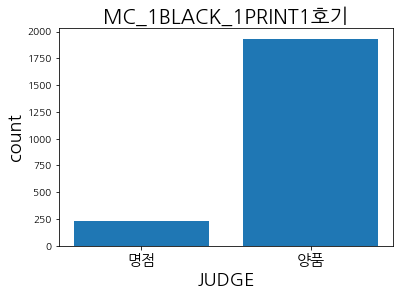

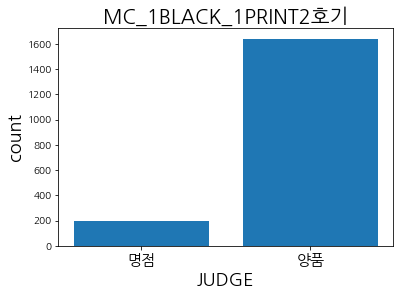

In [103]:
# Summary Statistics

m1 = mfg_temp.groupby(['MC_1BLACK_1PRINT','JUDGE'])['MC_1BLACK_2RTD'].count()
m1

label = ['명점', '양품']

index = np.arange(len(label))

# # Basic Bar Chart

plt.bar(index,m1['1호기'])

plt.title('MC_1BLACK_1PRINT'+'1호기', fontsize=20)

plt.xlabel('JUDGE', fontsize=18)

plt.ylabel('count', fontsize=18)

plt.xticks(index, label, fontsize=15)

plt.show()


plt.bar(index,m1['2호기'])

plt.title('MC_1BLACK_1PRINT'+'2호기', fontsize=20)

plt.xlabel('JUDGE', fontsize=18)

plt.ylabel('count', fontsize=18)

plt.xticks(index, label, fontsize=15)

plt.show()


In [108]:
m1['1호기']['명점']

227

In [158]:
def draw_multi_piechart(data, g_hogi):
    group_colors = [ 'lightskyblue', 'lightcoral']
    group_names = ['명점','양품']

    group_explodes=(0.1, 0)

    for hogi in g_hogi:
        group_sizes=[]
        group_sizes.append(data[hogi]['명점'])
        group_sizes.append(data[hogi]['양품'])
        plt.pie(group_sizes,explode=group_explodes, colors=group_colors, autopct='%1.2f%%',
               shadow=True, startangle=90, textprops={'fontsize':14},labels=group_names)
        plt.axis('equal')
        plt.title(hogi, fontsize=20)
        plt.show()

MC_1BLACK_1PRINT


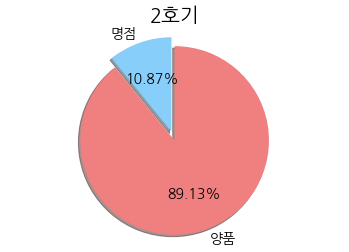

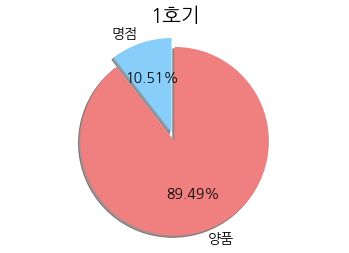

MC_1BLACK_2RTD


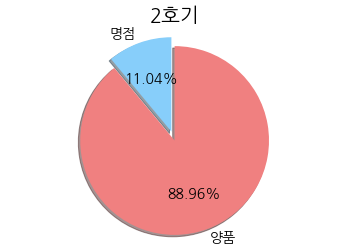

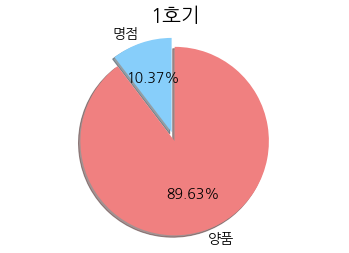

MC_2AG_1PRINT


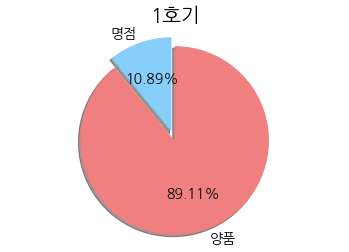

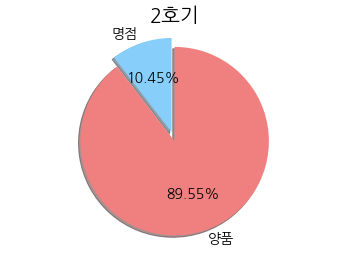

MC_2AG_2RTD


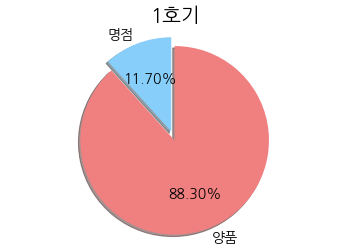

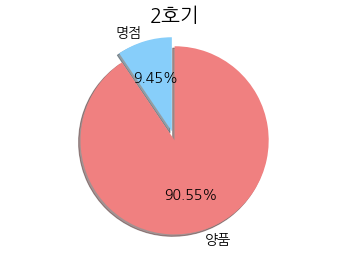

MC_2AG_3EXPOSURE


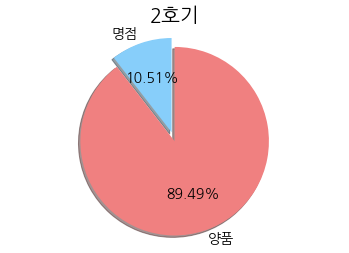

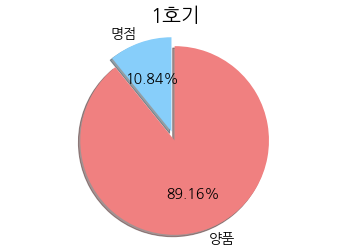

MC_3BUS_1DEVELOP


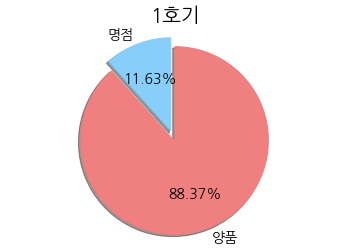

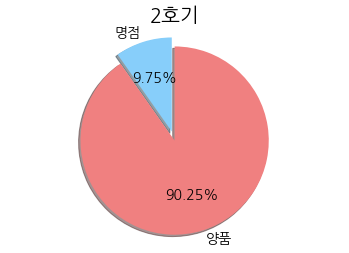

MC_3BUS_2FIRE


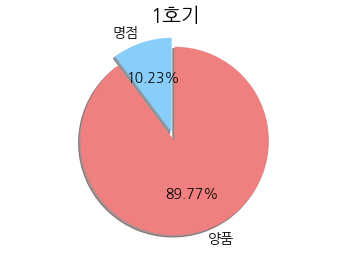

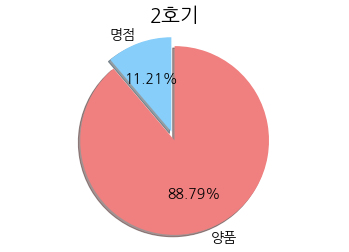

MC_4DIELEC_1FIRE


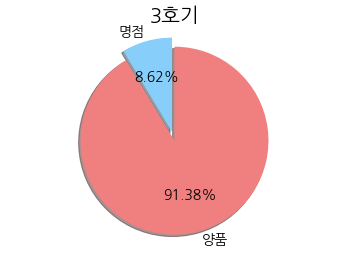

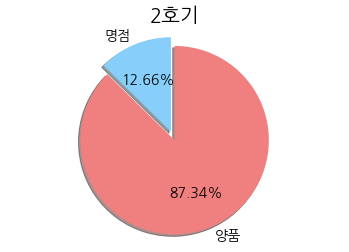

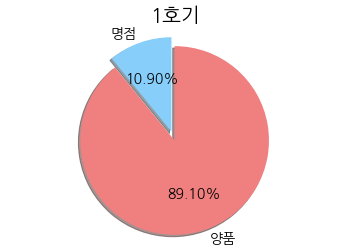

MC_5MGO


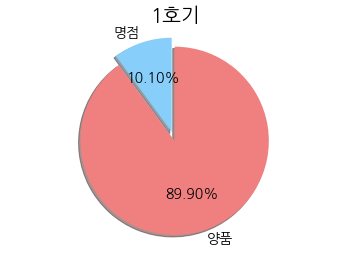

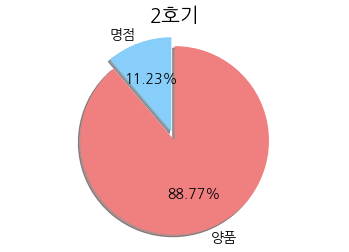

MC_6PHOS_1R_1DISPENSER


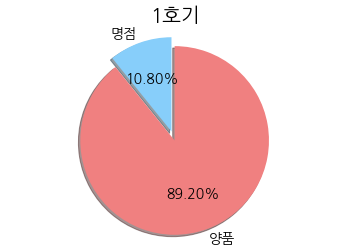

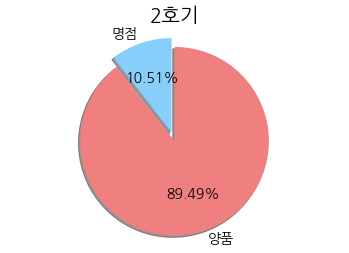

MC_6PHOS_1R_2DRY


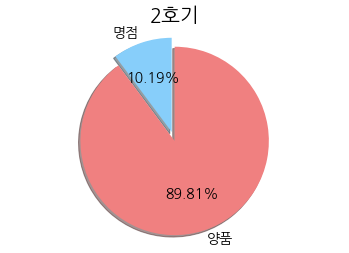

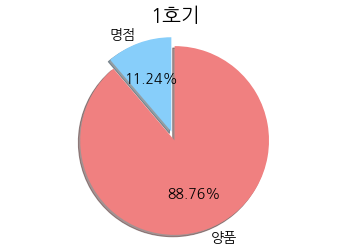

MC_6PHOS_2G_1DISPENSER


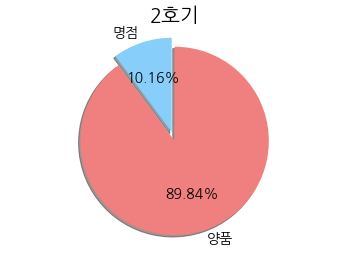

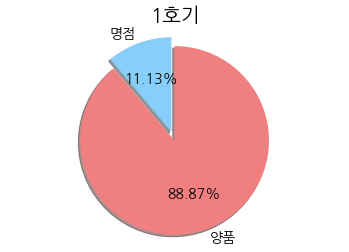

MC_6PHOS_2G_2DRY


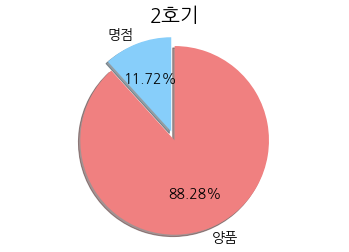

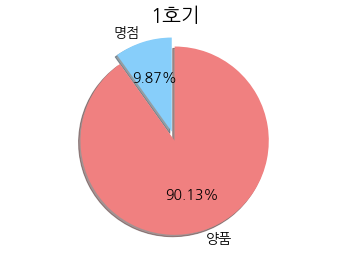

MC_6PHOS_3B_1DISPENSER


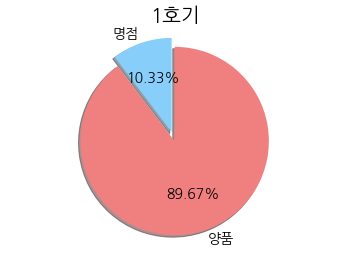

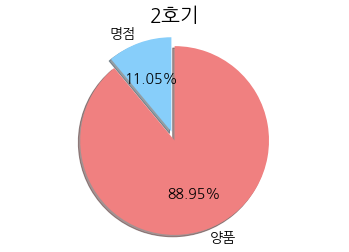

MC_6PHOS_4FIRE


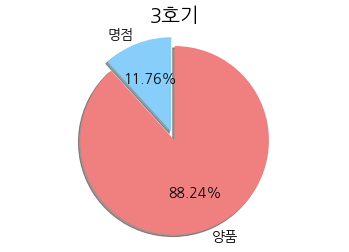

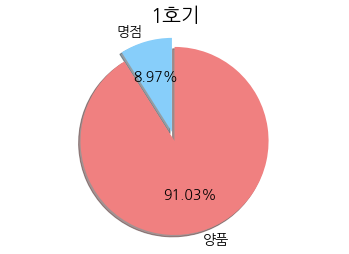

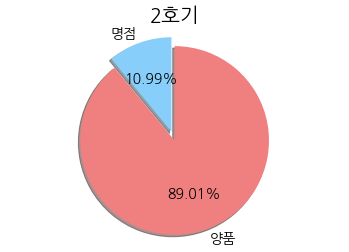

MC_7PASTE


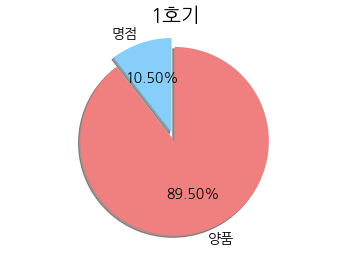

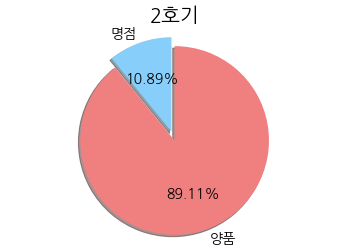

MC_8AGING


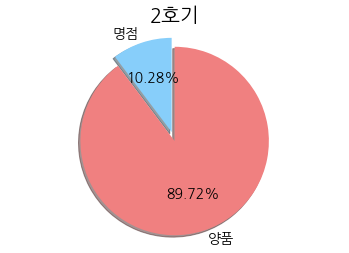

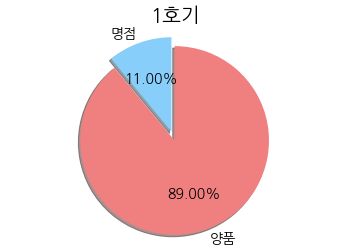

In [171]:
#hogi=m1.indexs()
for machine in mfg_temp.columns[:-1] : 
    print(machine)
    m1 = mfg_temp.groupby([machine,'JUDGE'])[machine].count()
    draw_multi_piechart(m1,list(mfg_machine[machine].unique()))

In [178]:
mfg_machine.columns

Index(['JUDGE', 'LOT_ID', 'PANEL_ID', 'DATE_1BLACK', 'TIME_1BLACK', 'TIME_2AG',
       'TIME_3BUS', 'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE',
       'TIME_8AGING', 'MC_1BLACK_1PRINT', 'MC_1BLACK_2RTD', 'MC_2AG_1PRINT',
       'MC_2AG_2RTD', 'MC_2AG_3EXPOSURE', 'MC_3BUS_1DEVELOP', 'MC_3BUS_2FIRE',
       'MC_4DIELEC_1FIRE', 'MC_5MGO', 'MC_6PHOS_1R_1DISPENSER',
       'MC_6PHOS_1R_2DRY', 'MC_6PHOS_2G_1DISPENSER', 'MC_6PHOS_2G_2DRY',
       'MC_6PHOS_3B_1DISPENSER', 'MC_6PHOS_4FIRE', 'MC_7PASTE', 'MC_8AGING'],
      dtype='object')

### Machine Dataset 기술통계량 확인

In [189]:
mfg_machine.describe().T

,count,unique,top,freq
JUDGE,4000,2,양품,3573
LOT_ID,4000,200,LOT-157,20
PANEL_ID,4000,20,PNL-15,200
DATE_1BLACK,4000,124,2019-06-19,33
TIME_1BLACK,4000,3993,2019-04-25 7:17,2
TIME_2AG,4000,3993,2019-04-06 18:59,2
TIME_3BUS,4000,3993,2019-04-07 0:39,2
TIME_4DIELEC,4000,3993,2019-05-26 14:12,2
TIME_5MGO,4000,3993,2019-04-23 1:24,2
TIME_6PHOS,4000,3991,2019-04-09 9:49,2


In [191]:
mfg_machine['TIME_6PHOS'].value_counts().head(9)

2019-04-09 9:49     2
2019-06-07 6:52     2
2019-07-12 14:15    2
2019-05-23 19:30    2
2019-07-13 10:10    2
2019-06-07 9:49     2
2019-06-24 6:42     2
2019-04-28 2:57     2
2019-04-15 17:44    2
Name: TIME_6PHOS, dtype: int64

# LOT 별 같은 path인지 알아보자 ~~~~ !

In [258]:
c=mfg_machine[mfg_machine['LOT_ID']=='LOT-101'].columns

for co in c:
    print(mfg_machine[mfg_machine['LOT_ID']=='LOT-101'][co].value_counts())

양품    18
명점     2
Name: JUDGE, dtype: int64
LOT-101    20
Name: LOT_ID, dtype: int64
PNL-11    1
PNL-15    1
PNL-13    1
PNL-02    1
PNL-12    1
PNL-14    1
PNL-18    1
PNL-06    1
PNL-08    1
PNL-20    1
PNL-10    1
PNL-03    1
PNL-09    1
PNL-17    1
PNL-19    1
PNL-16    1
PNL-01    1
PNL-04    1
PNL-07    1
PNL-05    1
Name: PANEL_ID, dtype: int64
2019-04-01    20
Name: DATE_1BLACK, dtype: int64
2019-04-01 05:55:00    1
2019-04-01 03:42:00    1
2019-04-01 05:10:00    1
2019-04-01 07:23:00    1
2019-04-01 09:36:00    1
2019-04-01 11:49:00    1
2019-04-01 00:45:00    1
2019-04-01 02:58:00    1
2019-04-01 11:04:00    1
2019-04-01 13:17:00    1
2019-04-01 02:13:00    1
2019-04-01 04:26:00    1
2019-04-01 06:39:00    1
2019-04-01 08:52:00    1
2019-04-01 00:01:00    1
2019-04-01 08:07:00    1
2019-04-01 10:20:00    1
2019-04-01 12:33:00    1
2019-04-01 01:29:00    1
2019-04-01 14:01:00    1
Name: TIME_1BLACK, dtype: int64
2019-04-01 10:30:00    1
2019-04-01 19:21:00    1
2019-04-01 14:5

In [195]:
li=['2019-04-09 9:49','2019-06-07 6:52','2019-07-12 14:15','2019-05-23 19:30',
   '2019-07-13 10:10','2019-06-07 9:49','2019-06-24 6:42','2019-04-28 2:57','2019-04-15 17:44']

In [228]:
panel_list=[]
for l in li:
    subList=[]
    print(mfg_machine[mfg_machine['TIME_6PHOS']==l]['PANEL_ID'])
    subList.append(mfg_machine[mfg_machine['TIME_6PHOS']==l]['PANEL_ID'].iloc[0])
    subList.append(mfg_machine[mfg_machine['TIME_6PHOS']==l]['PANEL_ID'].iloc[1])
    panel_list.append(subList)
panel_list

181    PNL-02
188    PNL-09
Name: PANEL_ID, dtype: object
2097    PNL-18
2114    PNL-15
Name: PANEL_ID, dtype: object
3242    PNL-03
3246    PNL-07
Name: PANEL_ID, dtype: object
1626    PNL-07
1636    PNL-17
Name: PANEL_ID, dtype: object
3264    PNL-05
3273    PNL-14
Name: PANEL_ID, dtype: object
2095    PNL-16
2101    PNL-02
Name: PANEL_ID, dtype: object
2647    PNL-08
2650    PNL-11
Name: PANEL_ID, dtype: object
790    PNL-11
796    PNL-17
Name: PANEL_ID, dtype: object
381    PNL-02
387    PNL-08
Name: PANEL_ID, dtype: object


[['PNL-02', 'PNL-09'],
 ['PNL-18', 'PNL-15'],
 ['PNL-03', 'PNL-07'],
 ['PNL-07', 'PNL-17'],
 ['PNL-05', 'PNL-14'],
 ['PNL-16', 'PNL-02'],
 ['PNL-08', 'PNL-11'],
 ['PNL-11', 'PNL-17'],
 ['PNL-02', 'PNL-08']]

In [214]:
check_list=[]
for l in li:
    subList=[]
    #print(l)
    print(mfg_machine[mfg_machine['TIME_6PHOS']==l]['LOT_ID'].iloc[0])
    subList.append(mfg_machine[mfg_machine['TIME_6PHOS']==l]['LOT_ID'].iloc[0])
    subList.append(mfg_machine[mfg_machine['TIME_6PHOS']==l]['LOT_ID'].iloc[1])
    check_list.append(subList)
check_list

LOT-110
LOT-205
LOT-263
LOT-182
LOT-264
LOT-205
LOT-233
LOT-140
LOT-120


[['LOT-110', 'LOT-110'],
 ['LOT-205', 'LOT-206'],
 ['LOT-263', 'LOT-263'],
 ['LOT-182', 'LOT-182'],
 ['LOT-264', 'LOT-264'],
 ['LOT-205', 'LOT-206'],
 ['LOT-233', 'LOT-233'],
 ['LOT-140', 'LOT-140'],
 ['LOT-120', 'LOT-120']]

In [240]:
panel_list

[['PNL-02', 'PNL-09'],
 ['PNL-18', 'PNL-15'],
 ['PNL-03', 'PNL-07'],
 ['PNL-07', 'PNL-17'],
 ['PNL-05', 'PNL-14'],
 ['PNL-16', 'PNL-02'],
 ['PNL-08', 'PNL-11'],
 ['PNL-11', 'PNL-17'],
 ['PNL-02', 'PNL-08']]

In [238]:
idx=0
for f,s in check_list:
    if f != s:
        pass
    else:
        #print(panel_list[idx][0])
        print(mfg_machine[(mfg_machine['LOT_ID']==f) & (mfg_machine['PANEL_ID']==panel_list[idx][0])])
        #print(f,s)
        #print(mfg_machine[mfg_machine['LOT_ID']==f].iloc[1]['TIME_1BLACK']-mfg_machine[mfg_machine['LOT_ID']==f].iloc[0]['TIME_1BLACK'])
    idx+=1

    JUDGE   LOT_ID PANEL_ID DATE_1BLACK         TIME_1BLACK  \
181    양품  LOT-110   PNL-02  2019-04-06 2019-04-06 13:39:00   

               TIME_2AG           TIME_3BUS        TIME_4DIELEC  \
181 2019-04-06 18:59:00 2019-04-07 00:39:00 2019-04-12 03:19:00   

              TIME_5MGO          TIME_6PHOS  ... MC_4DIELEC_1FIRE MC_5MGO  \
181 2019-04-16 17:19:00 2019-04-09 09:49:00  ...              2호기     2호기   

    MC_6PHOS_1R_1DISPENSER MC_6PHOS_1R_2DRY MC_6PHOS_2G_1DISPENSER  \
181                    1호기              2호기                    2호기   

    MC_6PHOS_2G_2DRY MC_6PHOS_3B_1DISPENSER MC_6PHOS_4FIRE MC_7PASTE MC_8AGING  
181              2호기                    2호기            2호기       1호기       1호기  

[1 rows x 29 columns]
     JUDGE   LOT_ID PANEL_ID DATE_1BLACK         TIME_1BLACK  \
3242    양품  LOT-263   PNL-03  2019-07-09 2019-07-09 20:38:00   

                TIME_2AG           TIME_3BUS        TIME_4DIELEC  \
3242 2019-07-10 01:58:00 2019-07-10 07:38:00 2019-07-15 10:1

mfg_machine.head()

In [247]:
mfg_machine[mfg_machine['LOT_ID']=='LOT-204'].T

,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079
JUDGE,양품,명점,양품,양품,양품,양품,명점,양품,양품,양품,양품,명점,명점,양품,양품,양품,양품,양품,양품,양품
LOT_ID,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204,LOT-204
PANEL_ID,PNL-01,PNL-02,PNL-03,PNL-04,PNL-05,PNL-06,PNL-07,PNL-08,PNL-09,PNL-10,PNL-11,PNL-12,PNL-13,PNL-14,PNL-15,PNL-16,PNL-17,PNL-18,PNL-19,PNL-20
DATE_1BLACK,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00,2019-06-03 00:00:00
TIME_1BLACK,2019-06-03 08:59:00,2019-06-03 09:43:00,2019-06-03 10:27:00,2019-06-03 11:11:00,2019-06-03 11:56:00,2019-06-03 12:40:00,2019-06-03 13:24:00,2019-06-03 14:08:00,2019-06-03 14:53:00,2019-06-03 15:37:00,2019-06-03 16:21:00,2019-06-03 17:05:00,2019-06-03 17:50:00,2019-06-03 18:34:00,2019-06-03 19:18:00,2019-06-03 20:02:00,2019-06-03 20:47:00,2019-06-03 21:31:00,2019-06-03 22:15:00,2019-06-03 22:59:00
TIME_2AG,2019-06-03 14:19:00,2019-06-03 15:03:00,2019-06-03 15:47:00,2019-06-03 16:31:00,2019-06-03 17:16:00,2019-06-03 18:00:00,2019-06-03 18:44:00,2019-06-03 19:28:00,2019-06-03 20:13:00,2019-06-03 20:57:00,2019-06-03 21:41:00,2019-06-03 22:25:00,2019-06-03 23:10:00,2019-06-03 23:54:00,2019-06-04 00:38:00,2019-06-04 01:22:00,2019-06-04 02:07:00,2019-06-04 02:51:00,2019-06-04 03:35:00,2019-06-04 04:19:00
TIME_3BUS,2019-06-03 19:59:00,2019-06-03 20:43:00,2019-06-03 21:27:00,2019-06-03 22:11:00,2019-06-03 22:56:00,2019-06-03 23:40:00,2019-06-04 00:24:00,2019-06-04 01:08:00,2019-06-04 01:53:00,2019-06-04 02:37:00,2019-06-04 03:21:00,2019-06-04 04:05:00,2019-06-04 04:50:00,2019-06-04 05:34:00,2019-06-04 06:18:00,2019-06-04 07:02:00,2019-06-04 07:47:00,2019-06-04 08:31:00,2019-06-04 09:15:00,2019-06-04 09:59:00
TIME_4DIELEC,2019-06-08 22:39:00,2019-06-08 23:23:00,2019-06-09 00:07:00,2019-06-09 00:51:00,2019-06-09 01:36:00,2019-06-09 02:20:00,2019-06-09 03:04:00,2019-06-09 03:48:00,2019-06-09 04:33:00,2019-06-09 05:17:00,2019-06-09 06:01:00,2019-06-09 06:45:00,2019-06-09 07:30:00,2019-06-09 08:14:00,2019-06-09 08:58:00,2019-06-09 09:42:00,2019-06-09 10:27:00,2019-06-09 11:11:00,2019-06-09 11:55:00,2019-06-09 12:39:00
TIME_5MGO,2019-06-13 12:39:00,2019-06-13 13:23:00,2019-06-13 14:07:00,2019-06-13 14:51:00,2019-06-13 15:36:00,2019-06-13 16:20:00,2019-06-13 17:04:00,2019-06-13 17:48:00,2019-06-13 18:33:00,2019-06-13 19:17:00,2019-06-13 20:01:00,2019-06-13 20:45:00,2019-06-13 21:30:00,2019-06-13 22:14:00,2019-06-13 22:58:00,2019-06-13 23:42:00,2019-06-14 00:27:00,2019-06-14 01:11:00,2019-06-14 01:55:00,2019-06-14 02:39:00
TIME_6PHOS,2019-06-06 03:35:00,2019-06-06 04:19:00,2019-06-06 05:03:00,2019-06-06 05:47:00,2019-06-06 06:32:00,2019-06-06 07:16:00,2019-06-06 08:00:00,2019-06-06 08:44:00,2019-06-06 09:29:00,2019-06-06 10:13:00,2019-06-06 10:57:00,2019-06-06 11:41:00,2019-06-06 12:26:00,2019-06-06 13:10:00,2019-06-06 13:54:00,2019-06-06 14:38:00,2019-06-06 15:23:00,2019-06-06 16:07:00,2019-06-06 16:51:00,2019-06-06 17:35:00


In [199]:
mfg_machine[mfg_machine['TIME_6PHOS']=='2019-06-07 6:52'].T

,2097,2114
JUDGE,명점,명점
LOT_ID,LOT-205,LOT-206
PANEL_ID,PNL-18,PNL-15
DATE_1BLACK,2019-06-04,2019-06-04
TIME_1BLACK,2019-06-04 12:17,2019-06-04 12:18
TIME_2AG,2019-06-04 17:37,2019-06-04 17:38
TIME_3BUS,2019-06-04 23:17,2019-06-04 23:18
TIME_4DIELEC,2019-06-10 1:57,2019-06-10 1:58
TIME_5MGO,2019-06-14 15:57,2019-06-14 15:58
TIME_6PHOS,2019-06-07 6:52,2019-06-07 6:52


In [206]:
mfg_machine[mfg_machine['LOT_ID']=='LOT-205'].iloc[0]

JUDGE                                   양품
LOT_ID                             LOT-205
PANEL_ID                            PNL-01
DATE_1BLACK                     2019-06-03
TIME_1BLACK               2019-06-03 23:45
TIME_2AG                   2019-06-04 5:05
TIME_3BUS                 2019-06-04 10:45
TIME_4DIELEC              2019-06-09 13:25
TIME_5MGO                  2019-06-14 3:25
TIME_6PHOS                2019-06-06 18:20
TIME_7PASTE               2019-06-14 12:25
TIME_8AGING               2019-06-14 14:05
MC_1BLACK_1PRINT                       2호기
MC_1BLACK_2RTD                         1호기
MC_2AG_1PRINT                          1호기
MC_2AG_2RTD                            1호기
MC_2AG_3EXPOSURE                       1호기
MC_3BUS_1DEVELOP                       2호기
MC_3BUS_2FIRE                          1호기
MC_4DIELEC_1FIRE                       3호기
MC_5MGO                                1호기
MC_6PHOS_1R_1DISPENSER                 1호기
MC_6PHOS_1R_2DRY                       2호기
MC_6PHOS_2G

In [204]:
mfg_machine[mfg_machine['LOT_ID']=='LOT-101'].iloc[0]

JUDGE                                   양품
LOT_ID                             LOT-101
PANEL_ID                            PNL-01
DATE_1BLACK                     2019-04-01
TIME_1BLACK                2019-04-01 0:01
TIME_2AG                   2019-04-01 5:21
TIME_3BUS                 2019-04-01 11:01
TIME_4DIELEC              2019-04-06 13:41
TIME_5MGO                  2019-04-11 3:41
TIME_6PHOS                2019-04-03 20:20
TIME_7PASTE               2019-04-11 12:41
TIME_8AGING               2019-04-11 14:21
MC_1BLACK_1PRINT                       2호기
MC_1BLACK_2RTD                         2호기
MC_2AG_1PRINT                          1호기
MC_2AG_2RTD                            1호기
MC_2AG_3EXPOSURE                       2호기
MC_3BUS_1DEVELOP                       1호기
MC_3BUS_2FIRE                          1호기
MC_4DIELEC_1FIRE                       3호기
MC_5MGO                                1호기
MC_6PHOS_1R_1DISPENSER                 1호기
MC_6PHOS_1R_2DRY                       2호기
MC_6PHOS_2G

In [205]:
mfg_machine[mfg_machine['LOT_ID']=='LOT-102'].iloc[0]

JUDGE                                   양품
LOT_ID                             LOT-102
PANEL_ID                            PNL-01
DATE_1BLACK                     2019-04-01
TIME_1BLACK               2019-04-01 14:47
TIME_2AG                  2019-04-01 20:07
TIME_3BUS                  2019-04-02 1:47
TIME_4DIELEC               2019-04-07 4:27
TIME_5MGO                 2019-04-11 18:27
TIME_6PHOS                2019-04-04 11:05
TIME_7PASTE                2019-04-12 3:27
TIME_8AGING                2019-04-12 5:07
MC_1BLACK_1PRINT                       1호기
MC_1BLACK_2RTD                         1호기
MC_2AG_1PRINT                          2호기
MC_2AG_2RTD                            1호기
MC_2AG_3EXPOSURE                       2호기
MC_3BUS_1DEVELOP                       1호기
MC_3BUS_2FIRE                          2호기
MC_4DIELEC_1FIRE                       3호기
MC_5MGO                                2호기
MC_6PHOS_1R_1DISPENSER                 1호기
MC_6PHOS_1R_2DRY                       2호기
MC_6PHOS_2G

# MFG_PROCESS 데이터셋 확인

In [179]:
mfg_process=pd.read_csv("data/MFG_PROCESS.csv", encoding="cp949")
for c in mfg_process.columns:
    print(c)

JUDGE
LOT_ID
PANEL_ID
TIME_1BLACK
TIME_2AG
TIME_3BUS
TIME_4DIELEC
TIME_5MGO
TIME_6PHOS
TIME_7PASTE
TIME_8AGING
BLACK_RTD_TEMP_GLASS_START
BLACK_RTD_TEMP_GLASS_END
BLACK_RTD_TEMP_WALL_START
BLACK_RTD_TEMP_WALL_MAX
BLACK_RTD_PRES_START
BLACK_RTD_PRES_END
BLACK_RTD_TEMP_GLASS_OUT
BLACK_RTD_TEMP_HOOD_START
BLACK_RTD_TEMP_HOOD_MAX
AG_RTD_TEMP_GLASS_START
AG_RTD_TEMP_GLASS_END
AG_RTD_TEMP_WALL_START
AG_RTD_TEMP_WALL_MAX
AG_RTD_PRES_START
AG_RTD_PRES_END
AG_RTD_TEMP_GLASS_OUT
AG_RTD_TEMP_HOOD_START
AG_RTD_TEMP_HOOD_MAX
AG_EXPOSURE_TEMP_MASK
BUS_DEVELOP_TEMP_OVEN1
BUS_DEVELOP_TEMP_OVEN2
BUS_DEVELOP_TEMP_OVEN3
BUS_DEVELOP_PH_TANK1
BUS_DEVELOP_TEMP_TANK1
BUS_DEVELOP_PH_TANK1.1
BUS_DEVELOP_TEMP_TANK2
BUS_DEVELOP_PH_TANK1.2
BUS_DEVELOP_TEMP_TANK3
BUS_DEVELOP_PRES1
BUS_DEVELOP_PRES2
BUS_DEVELOP_PRES3
BUS_FIRE_TEMP_HEAT1_CH01
BUS_FIRE_TEMP_HEAT1_CH02
BUS_FIRE_TEMP_HEAT1_CH03
BUS_FIRE_TEMP_HEAT2_CH01
BUS_FIRE_TEMP_HEAT2_CH02
BUS_FIRE_TEMP_HEAT2_CH03
BUS_FIRE_TEMP_KEEP_CH01
BUS_FIRE_TEMP_KEEP_CH02
BUS

In [251]:
mfg_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 107 entries, JUDGE to PHOS_FIRE_EXHAUST_HEAT4
dtypes: float64(96), object(11)
memory usage: 3.3+ MB


In [207]:
temp=mfg_process.drop(['JUDGE','LOT_ID','PANEL_ID','TIME_1BLACK','TIME_2AG','TIME_3BUS','TIME_4DIELEC',
                      'TIME_5MGO','TIME_6PHOS','TIME_7PASTE','TIME_8AGING'],axis=1)
temp.columns

Index(['BLACK_RTD_TEMP_GLASS_START', 'BLACK_RTD_TEMP_GLASS_END',
       'BLACK_RTD_TEMP_WALL_START', 'BLACK_RTD_TEMP_WALL_MAX',
       'BLACK_RTD_PRES_START', 'BLACK_RTD_PRES_END',
       'BLACK_RTD_TEMP_GLASS_OUT', 'BLACK_RTD_TEMP_HOOD_START',
       'BLACK_RTD_TEMP_HOOD_MAX', 'AG_RTD_TEMP_GLASS_START',
       'AG_RTD_TEMP_GLASS_END', 'AG_RTD_TEMP_WALL_START',
       'AG_RTD_TEMP_WALL_MAX', 'AG_RTD_PRES_START', 'AG_RTD_PRES_END',
       'AG_RTD_TEMP_GLASS_OUT', 'AG_RTD_TEMP_HOOD_START',
       'AG_RTD_TEMP_HOOD_MAX', 'AG_EXPOSURE_TEMP_MASK',
       'BUS_DEVELOP_TEMP_OVEN1', 'BUS_DEVELOP_TEMP_OVEN2',
       'BUS_DEVELOP_TEMP_OVEN3', 'BUS_DEVELOP_PH_TANK1',
       'BUS_DEVELOP_TEMP_TANK1', 'BUS_DEVELOP_PH_TANK1.1',
       'BUS_DEVELOP_TEMP_TANK2', 'BUS_DEVELOP_PH_TANK1.2',
       'BUS_DEVELOP_TEMP_TANK3', 'BUS_DEVELOP_PRES1', 'BUS_DEVELOP_PRES2',
       'BUS_DEVELOP_PRES3', 'BUS_FIRE_TEMP_HEAT1_CH01',
       'BUS_FIRE_TEMP_HEAT1_CH02', 'BUS_FIRE_TEMP_HEAT1_CH03',
       'BUS_FIRE_TEMP_H

이상치 확인

In [250]:
c=0
columns=mfg_process.columns
strFormat = '%-30s %-15s' # 컬럼명의 출력 포멧

for m in mfg_process.isnull().sum():
    print(strFormat%(columns[c],m))
    c+=1

JUDGE                          0              
LOT_ID                         0              
PANEL_ID                       0              
TIME_1BLACK                    0              
TIME_2AG                       0              
TIME_3BUS                      0              
TIME_4DIELEC                   0              
TIME_5MGO                      0              
TIME_6PHOS                     0              
TIME_7PASTE                    0              
TIME_8AGING                    0              
BLACK_RTD_TEMP_GLASS_START     4              
BLACK_RTD_TEMP_GLASS_END       4              
BLACK_RTD_TEMP_WALL_START      4              
BLACK_RTD_TEMP_WALL_MAX        4              
BLACK_RTD_PRES_START           4              
BLACK_RTD_PRES_END             4              
BLACK_RTD_TEMP_GLASS_OUT       4              
BLACK_RTD_TEMP_HOOD_START      4              
BLACK_RTD_TEMP_HOOD_MAX        4              
AG_RTD_TEMP_GLASS_START        0              
AG_RTD_TEMP_G

In [239]:
def check_outlier_cnt(data,x,c):
   # print(x)
    q75, q25 = np.percentile(x, [75 ,25])
    #print(q75, q25)
    #iqr = q75 - q25
    if np.isnan(q75) or np.isnan(q25):
        pass
        #iqr = np.subtract(*np.percentile(x, [75, 25]))
        #print(q75, q25)
    else:
        cnt=len(data[(data[c]>=q75) or (data[c]<=q25)])
        return cnt 

In [240]:
for c in temp.columns:
    print(c, check_outlier_cnt(mfg_process,mfg_process[c],c))

BLACK_RTD_TEMP_GLASS_START None
BLACK_RTD_TEMP_GLASS_END None
BLACK_RTD_TEMP_WALL_START None
BLACK_RTD_TEMP_WALL_MAX None
BLACK_RTD_PRES_START None
BLACK_RTD_PRES_END None
BLACK_RTD_TEMP_GLASS_OUT None
BLACK_RTD_TEMP_HOOD_START None
BLACK_RTD_TEMP_HOOD_MAX None


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [206]:
check_outlier_cnt(mfg_process['AG_RTD_PRES_END'])

48.0

In [17]:
mfg_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 107 entries, JUDGE to PHOS_FIRE_EXHAUST_HEAT4
dtypes: float64(96), object(11)
memory usage: 3.3+ MB


# MFG_WORK_TIME 데이터셋 확인

In [254]:
mfg_work_time=pd.read_csv("data/MFG_WORK_TIME.csv",  encoding="cp949")
mfg_work_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 28 columns):
JUDGE                      4000 non-null object
LOT_ID                     4000 non-null object
PANEL_ID                   4000 non-null object
TIME_1BLACK                4000 non-null object
TIME_2AG                   4000 non-null object
TIME_3BUS                  4000 non-null object
TIME_4DIELEC               4000 non-null object
TIME_5MGO                  4000 non-null object
TIME_6PHOS                 4000 non-null object
TIME_7PASTE                4000 non-null object
TIME_8AGING                4000 non-null object
TAT_1BLACK_1PRINT          4000 non-null int64
TAT_1BLACK_2RTD            3996 non-null float64
TAT_2AG_1PRINT             3994 non-null float64
TAT_2AG_2RTD               4000 non-null int64
TAT_2AG_3EXPOSURE          3912 non-null float64
TAT_3BUS_1DEVELOP          3966 non-null float64
TAT_3BUS_2FIRE             3991 non-null float64
TAT_4DIELEC_FIRE          

In [255]:
mfg_work_time.isnull().sum()

JUDGE                        0
LOT_ID                       0
PANEL_ID                     0
TIME_1BLACK                  0
TIME_2AG                     0
TIME_3BUS                    0
TIME_4DIELEC                 0
TIME_5MGO                    0
TIME_6PHOS                   0
TIME_7PASTE                  0
TIME_8AGING                  0
TAT_1BLACK_1PRINT            0
TAT_1BLACK_2RTD              4
TAT_2AG_1PRINT               6
TAT_2AG_2RTD                 0
TAT_2AG_3EXPOSURE           88
TAT_3BUS_1DEVELOP           34
TAT_3BUS_2FIRE               9
TAT_4DIELEC_FIRE           165
TAT_5MGO                    57
TAT_6PHOS_1R_1DISPENSER     25
TAT_6PHOS_1R_2DRY           25
TAT_6PHOS_2G_1DISPENSER     47
TAT_6PHOS_2G_2DRY           57
TAT_6PHOS_3B_1DISPENSER     31
TAT_6PHOS_4FIRE             27
TAT_7PASTE                  16
TAT_8AGING                  44
dtype: int64

## 참조용-mfg_df_ratio_date

In [76]:
mgf_df_ratio_date=pd.read_csv("data/참조용-mfg_df_ratio_date.csv",encoding="cp949", sep="\t", parse_dates=['날자'])
mgf_df_ratio_date['불량률'].value_counts()

6%     25
9%     25
15%    16
3%     12
13%    11
12%    10
16%     7
19%     5
22%     4
0%      3
21%     3
18%     2
Name: 불량률, dtype: int64

In [77]:
mgf_df_ratio_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 4 columns):
날자     123 non-null datetime64[ns]
명점     123 non-null int64
양품     123 non-null int64
불량률    123 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.9+ KB


In [79]:
mgf_df_ratio_date['불량률'].value_counts()

6%     25
9%     25
15%    16
3%     12
13%    11
12%    10
16%     7
19%     5
22%     4
0%      3
21%     3
18%     2
Name: 불량률, dtype: int64

In [80]:
mgf_df_ratio_date[mgf_df_ratio_date['불량률']=="6%"]

,날자,명점,양품,불량률
3,2019-04-04,2,31,6%
6,2019-04-07,2,30,6%
8,2019-04-09,2,30,6%
10,2019-04-11,2,30,6%
22,2019-04-23,2,30,6%
25,2019-04-26,2,31,6%
26,2019-04-27,2,30,6%
32,2019-05-03,2,30,6%
33,2019-05-04,2,31,6%
34,2019-05-05,2,30,6%


In [85]:
mgf_df_ratio_date['rate']=[int(d.split("%")[0]) for d in mgf_df_ratio_date['불량률']]
mgf_df_ratio_date.head()

,날자,명점,양품,불량률,rate
0,2019-04-01,3,30,9%,9
1,2019-04-02,3,29,9%,9
2,2019-04-03,1,32,3%,3
3,2019-04-04,2,31,6%,6
4,2019-04-05,0,32,0%,0


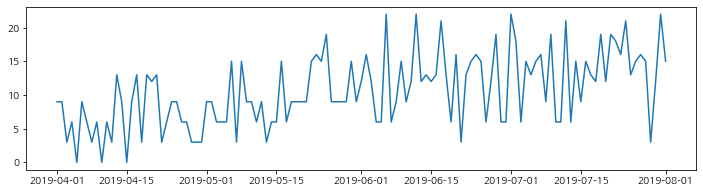

In [102]:
temp=mgf_df_ratio_date[['rate','날자']]
plt.figure(figsize=(12, 3))
temp.set_index('날자')
plt.plot(temp.날자,temp.rate)

#mgf_df_ratio_date[['rate','날자']].plot()